Columns in the dataset: Index(['DATE', 'IPG2211A2N'], dtype='object')
Mean Squared Error: 97.45965153192064
R-squared: 0.6399342093248173


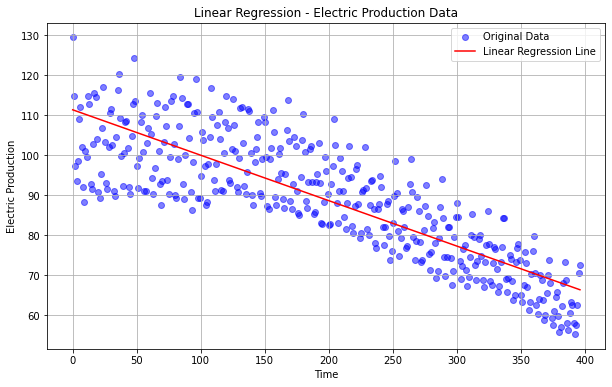

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r'Electric_Production.csv'
data = pd.read_csv(file_path)

# Check the columns to see what data is available
print("Columns in the dataset:", data.columns)

# Ensure there are no leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Check if 'IPG2211A2N' column exists
if 'IPG2211A2N' not in data.columns:
    raise KeyError("'IPG2211A2N' column not found in the dataset. Please check the column name.")

# Access the 'IPG2211A2N' column
production_data = data['IPG2211A2N']

# Reverse the order of the data to maintain chronological order
production_data_reverse = production_data.iloc[::-1]

# Reset index to maintain the correct time series order
production_data_reverse.reset_index(drop=True, inplace=True)

# Handle Missing Values
data['IPG2211A2N'].fillna(data['IPG2211A2N'].mean(), inplace=True)

# Handle Outliers using IQR for 'IPG2211A2N' column
Q1 = data['IPG2211A2N'].quantile(0.25)
Q3 = data['IPG2211A2N'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers based on the IQR bounds
data = data[(data['IPG2211A2N'] >= lower_bound) & (data['IPG2211A2N'] <= upper_bound)]

# Prepare the data for Linear Regression
# We'll use time (index) as the independent variable (X) and electric production as the dependent variable (y)
X = np.array(range(len(production_data_reverse))).reshape(-1, 1)  # Time index as the feature
y = production_data_reverse.values  # Electric production as the target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot the original data
plt.scatter(X, y, color='blue', alpha=0.5, label="Original Data")

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label="Linear Regression Line")

plt.title('Linear Regression - Electric Production Data')
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.legend()
plt.grid(True)
plt.show()
